# <center><B> LIGHT CURVE ANALYSIS OF VARIABLE STARS FROM GAIA Data </B> </center>
## <center> <B>Final Project DSP (DSE 315) </B> </center>
### <center><B>Divyansh Tripathi - 20108 </B></center>
#### <center>Department of Physics</center>

# <B>Overview</B>

Stars as we know are one of the most important thing in the astronomy. Life is possible on earth also due to a star, <B> Sun </B>. Due to our everyday experince and prior knowledge we would expect a star to be a astronomical body whose brightness doesn't change appreciably. This is not true in the case of <B> Variable Stars </B> , which as the name suggests re stars whose brightness vary in detectable amount in the matter of days or months.

In this Project I have analysed the Light Curves of variable stars determining its change in magnitude of brightness , pulsation period and other important things. I have done this project in a constructive manner , and first presented the method of analysing light curves using synthetic dataset and then applying those method on Real Variable Star Dataset.

# <B>Research Question</B>

In this project I tried to analyse the <B>Light Curve Data</B> of the <B>Cepheid Variable </B> and other Variable Stars like <B> RR Layre </B> and also analysed data of various astrophysical parameters of these stars and tried to mimic the results of previous reserach works

# <B> Background and Prior Work</B>

Since the Variables Stars came into light many extensive studies are carried out about the pulsating nature of these stars and how these stars undergo periodic pulsation and how on the HR Diagram of they are confined to particular temperature range of 5000-7000 K known as the Instability Strip. The Cepheids also have a distinct Period Luminosity Relation which is a important area of research .

## <B> References </B>

<ol>
<li> <a href = "https://arxiv.org/abs/1202.0150"> <I>Period-Luminosity Relations for Cepheid Variables </I> </a> </li>

<li> <a href = "https://arxiv.org/abs/2201.04748"> <I>Study of changes in the pulsation period of 148 Galactic Cepheid variables
</I> </a> </li>

<li><I><a href = "https://onlinelibrary.wiley.com/doi/book/10.1002/9783527655182" >Pulsating Stars by Márcio Catelan, Horace A. Smith DOI:10.1002/9783527655182</a></I></li>

</ol>

# <B>Hypothesis</B>

In this whole analysis we assume that all the pulsations are due to one-zoned model and equations of stellar astrophysics hold true to a good degree of accuracy

# <B>Dataset</B>

<B>Dataset Name </B> = GAIA Sky Survey Data Relesase \
<B>Link to the Dataset </B> = https://gea.esac.esa.int/archive/ \
<B> No. of Observations </B> = 6525  x 11 \

<B> Description of Dataset </B> : 

Dataset of Observation done by GAIA Sky Survey of various astrophysical parameters of Cepheid Variables and RR- Lyare Stars 



In [2]:
%%html
<iframe src="https://ui.adsabs.harvard.edu/abs/2004JAVSO..32...41T/abstract" width="1500" height="500"></iframe>

In [66]:
from IPython.display import IFrame
IFrame("https://gea.esac.esa.int/archive/",1000,1000)

## Importing Required Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import astropy 
from astropy.timeseries import LombScargle
import seaborn as sns

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia


## Generating a Synthetic DataSet

Text(0, 0.5, 'Flux')

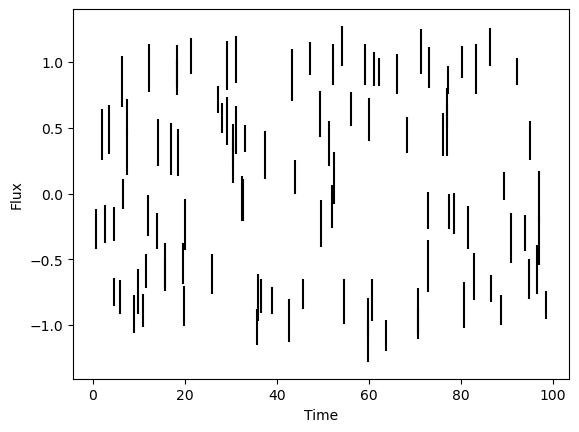

In [4]:
rand = np.random.RandomState(42)
t = 100*rand.rand(100)
y = np.sin(2*np.pi*t)+0.1*rand.randn(100)
dy = 0.1*(1+rand.rand(100))

plt.errorbar(t,y,dy,ls = 'None',c='k')
plt.xlabel('Time')
plt.ylabel('Flux')

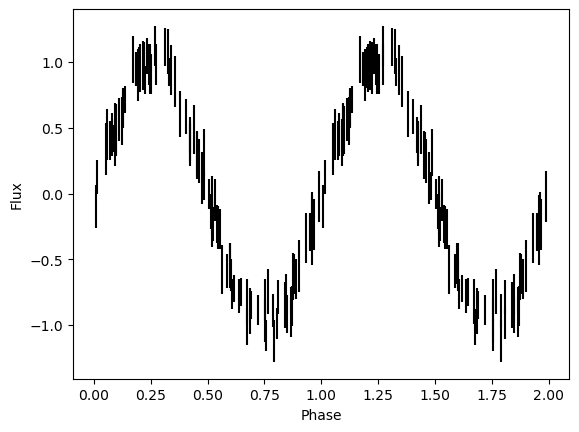

In [5]:
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def phase_fold(t,y,dy,period):
    phases = np.remainder(t,period)/period
    phases = np.concatenate((phases,phases+1))
    y = np.concatenate((y,y))
    dy = np.concatenate((dy,dy))
    plt.errorbar(phases,y,dy,ls = 'none',c = 'k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')

phase_fold(t,y,dy,1)

## Determining Period using PhaseFold Method

Text(0, 0.5, 'Differential Magnitude')

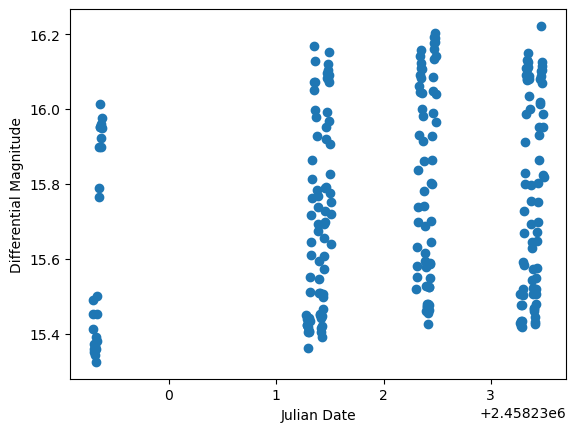

In [6]:
data=np.loadtxt("./data/asteroid1.csv",delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
plt.plot(t,y,ls='none',marker="o")
plt.xlabel('Julian Date')
plt.ylabel('Differential Magnitude')


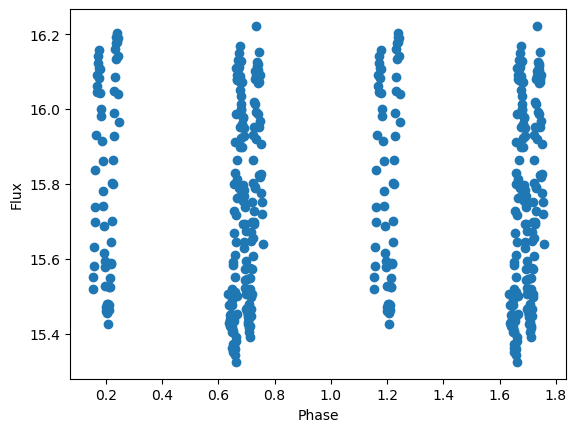

In [7]:
data=np.loadtxt("./data/asteroid1.csv",delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
period=2
#period in units of days

def phase_fold(t,y,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    plt.plot(phases,y,ls='none',marker="o")
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    
phase_fold(t,y,period)

## Determining Period Using Lomb-Scargle Periodogram of Synthestic Data 

1.0003718852975687

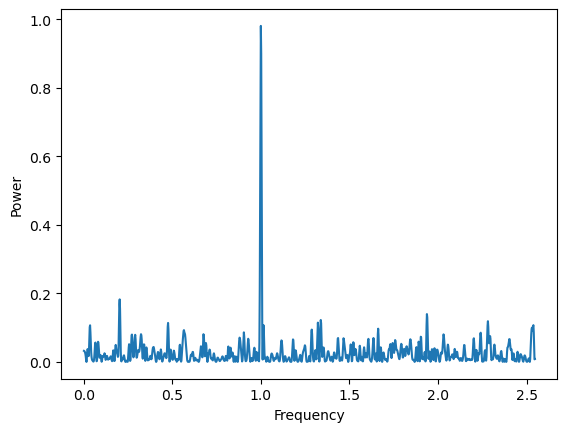

In [8]:
period = 1

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2*np.pi/period*t)+0.1 * rand.randn(100)
dy = 0.1*(1+rand.rand(100))

def lomb_scargle(t,y,dy):
    frequency, power = LombScargle(t, y, dy).autopower()
    plt.plot(frequency, power)
    plt.show
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    return 1/frequency[np.argmax(power)]

lomb_scargle(t,y,dy)


1


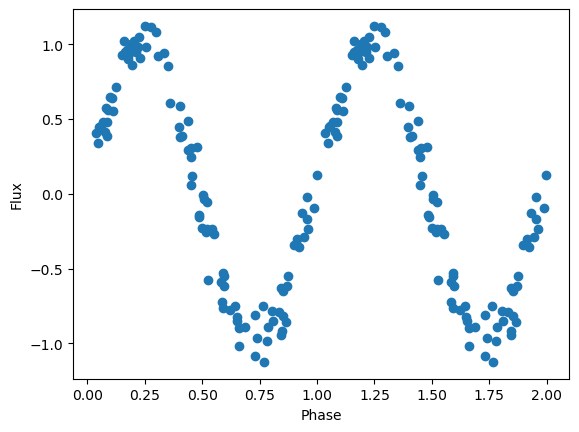

In [9]:
period=1

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi /period* t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def lomb_scargle(t,y,dy):

    frequency, power = LombScargle(t, y, dy).autopower()
    return 1/frequency[np.argmax(power)]

def plot_best_period(t,y,dy):
    phase_fold(t,y,lomb_scargle(t,y,dy))
    
    print(period)

plot_best_period(t,y,dy)

In [10]:
data=np.loadtxt("./data/cepheid.csv",delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]

### <B> Verifying our method on Clean and Processed Asteroid and Cepheid Data </B>

10.148137476588284


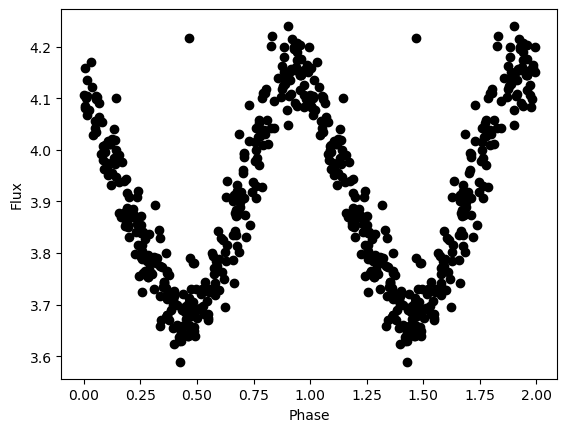

In [11]:
data=np.loadtxt("./data/cepheid.csv",delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]

def lomb_scargle(t,y):

    frequency, power = LombScargle(t, y).autopower()
    return 1/frequency[np.argmax(power)]

def phase_fold(t,y,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    plt.scatter(phases,y,c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    print(period)

def plot_best_period(t,y):
    phase_fold(t,y,lomb_scargle(t,y))

plot_best_period(t,y)

0.12391150442767986


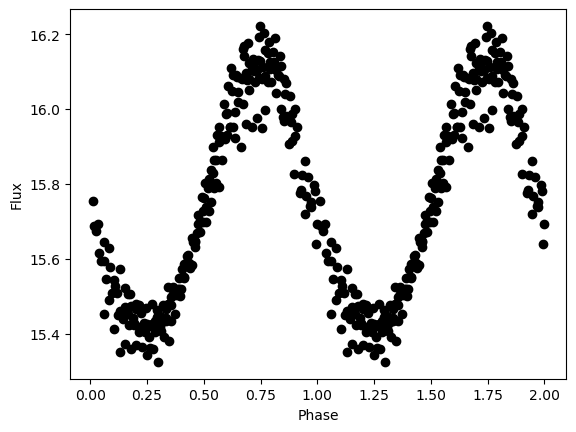

In [12]:
data=np.loadtxt("./data/asteroid1.csv",delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]

def lomb_scargle(t,y):

    frequency, power = LombScargle(t, y).autopower()
    return 1/frequency[np.argmax(power)]

def phase_fold(t,y,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    plt.scatter(phases,y,c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    print(period)

def plot_best_period(t,y):
    phase_fold(t,y,lomb_scargle(t,y))

plot_best_period(t,y)

# <B> Querying the Gaia Database For Data</B>

In [13]:
tabels = Gaia.load_tables(only_names=True)
for tabel in tabels:
    print(tabel.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


In [15]:
data1 = pd.read_csv("./data/1668606634859O-result.csv",delimiter=',')

## <B>Cleaning GAIA Data and performing EDA </B>

In [16]:
data1

,source_id,ra,dec,parallax,classification,phot_variable_fundam_freq1,mean,peak_to_peak_g,num_harmonics_for_p1,r21_g,phi21_g,best_classification
0,4656702360931582080,68.215589,-66.772730,NaN,RRLYR,1.763843,19.246315,0.917245,3,0.530502,4.012854,RRAB
1,4656714936595899008,67.732498,-66.710021,NaN,RRLYR,3.274648,19.166190,0.490785,2,0.160807,4.579561,RRC
2,4656716414064729984,67.933864,-66.603408,NaN,RRLYR,1.848370,19.356777,1.033297,4,0.604455,3.996911,RRAB
3,4656720846471011200,67.638948,-66.519624,NaN,RRLYR,2.915672,19.098242,0.469001,2,0.107953,4.350372,RRC
4,4658879737581295744,81.111425,-67.205368,NaN,RRLYR,2.031117,19.225011,0.866316,3,0.330551,4.370663,RRAB
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4661890578411596928,75.842150,-67.005897,NaN,RRLYR,1.721812,19.069341,0.600835,3,0.377963,4.228245,RRAB
996,4661891815306060800,75.704789,-66.930626,NaN,RRLYR,1.694103,19.542090,0.882945,4,0.444171,4.115845,RRAB
997,4661892605636285568,75.985277,-66.926818,NaN,RRLYR,1.837816,19.794675,0.851191,4,0.524119,3.911735,RRAB
998,4661892811738917632,75.875445,-66.908156,NaN,RRLYR,1.955167,19.361649,1.149090,5,0.472730,3.805052,RRAB


Text(0, 0.5, 'Fundamental Frequency')

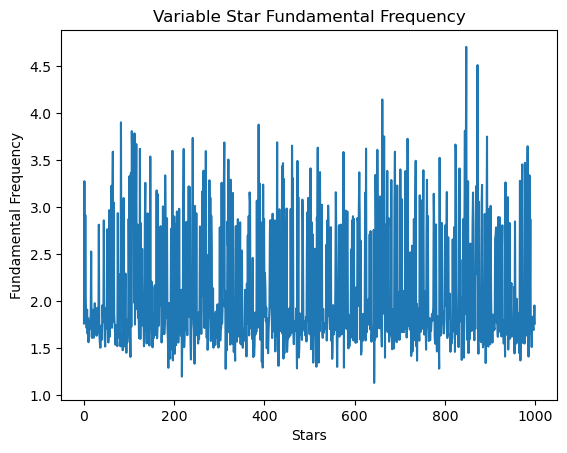

In [17]:
plt.plot(data1['phot_variable_fundam_freq1'])
plt.title('Variable Star Fundamental Frequency')
plt.xlabel('Stars')
plt.ylabel('Fundamental Frequency')

In [18]:
data2 = pd.read_csv("./data/1668606721916O-result.csv",delimiter=',')

In [19]:
data2

,observation_time,phase,g_magnitude,g_magnitude_error,rejected
0,1666.476607,0.159632,18.621802,0.016159,False
1,1666.652765,0.449856,18.962439,0.009896,False
2,1666.726771,0.571785,19.043705,0.010901,False
3,1666.902929,0.862009,19.189978,0.010247,False
4,1666.976936,0.983937,18.303622,0.010295,False
...,...,...,...,...,...
139,1893.769694,0.631744,19.078347,0.019741,False
140,1957.161635,0.071849,18.471875,0.012478,False
141,1985.902327,0.422993,19.005350,0.044253,False
142,1985.976334,0.544922,18.979518,0.017485,False


## <B> Doing Light Curve Analysis on Cepheid Data from GAIA </B>

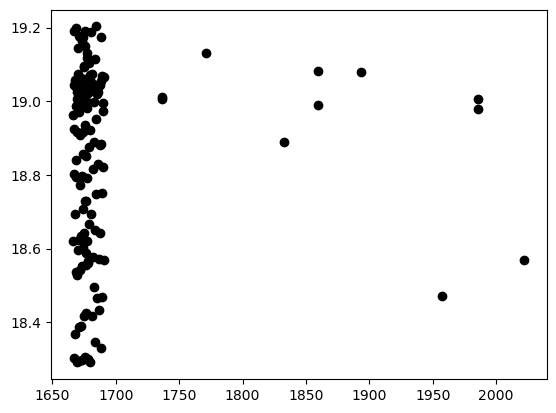

In [67]:
plt.scatter(data2['observation_time'],data2['g_magnitude'],c='k')

1.419160878043884


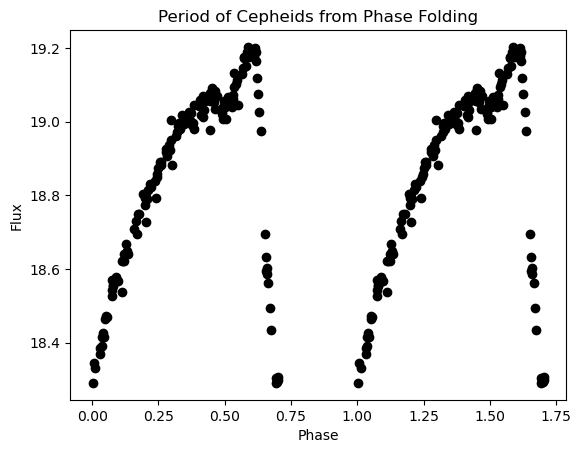

In [65]:
t=data2['phase']
y=data2['g_magnitude']

def lomb_scargle(t,y):

    frequency, power = LombScargle(t, y).autopower()
    return 1/frequency[np.argmax(power)]

def phase_fold(t,y,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    plt.scatter(phases,y,c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.title('Period of Cepheids from Phase Folding')
    print(period)

def plot_best_period(t,y):
    phase_fold(t,y,lomb_scargle(t,y))

plot_best_period(t,y)

In [45]:


pf_lim_hd = 150 * u.hour
pf_lim_dd = pf_lim_hd.to(u.day)

query = f'SELECT source_id, pf, pf_error, ap.teff_gspphot, ap.logg_gspphot, ap.mh_gspphot, ap.distance_gspphot, ap.azero_gspphot, ap.radius_gspphot, ap.ew_espels_halpha,  ap.spectraltype_esphs \
FROM gaiadr3.vari_cepheid \
JOIN gaiadr3.astrophysical_parameters AS ap USING (source_id) \
WHERE pf <{pf_lim_dd.value}'


job     = Gaia.launch_job_async(query,dump_to_file=True,output_file='AstroData_Cepheid.csv',output_format='csv')
results = job.get_results()
print(f'Table size (rows): {len(results)}')

#results['pf_hour']        = results['pf'].to(u.hour)
#results['pf_hour'].format = '5.3f'
results

Table size (rows): 6425


source_id,pf,pf_error,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,radius_gspphot,ew_espels_halpha,spectraltype_esphs
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7
4658039710832195200,2.9115728866339894,9.1524744e-05,6025.007,3.8696,-1.0426,3084.934,0.2579,1.7722,0.07133276,F
4658041707905510912,4.166964178709102,0.00020101762,5303.923,3.4977,-0.781,3370.9656,0.261,2.7323,0.0020608334,F
4658044491044146432,3.4963517744884873,9.192807e-05,5228.6235,3.6049,-0.5109,3360.7288,0.0098,2.4503,0.15803218,G
4658046002872198528,4.684897905487252,0.00016742878,5810.485,3.3378,-0.578,5065.9053,0.5152,4.5402,0.08369858,G
4658046621347287424,2.5742358719939955,0.00014547435,--,--,--,--,--,--,--,--
4658048717291383424,6.227153069761989,0.00033539836,5486.426,3.1405,-0.7906,5960.6265,0.1345,5.6727,0.09004871,G
4658053557649384320,1.8411137032810119,6.766984e-05,5738.4775,4.65,-3.869,3089.2083,0.0377,0.6338,--,--
4658057199781916032,4.608302166759037,0.0001054947,5243.1504,3.2811,-0.7301,4699.0615,0.1127,3.8129,0.024906792,G
4658058338020060800,5.972123211076766,0.00033495273,4955.7334,2.3439,-1.3455,6492.134,0.2952,9.8452,0.17052391,F


# <B>Data Analysis</B>

### <B>HR Diagram from Cepheids</B>

Text(0.5, 1.0, 'HR Diagram of Cepheid Variables')

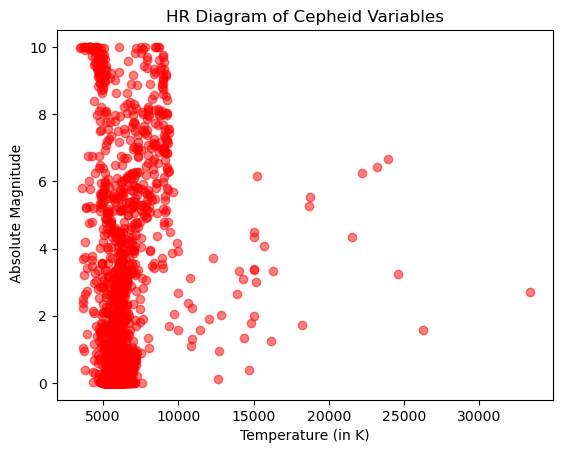

In [63]:
Cdata = pd.read_csv('AstroData_Cepheid.csv',delimiter=',')
plt.scatter(Cdata['teff_gspphot'],Cdata['azero_gspphot'],alpha=0.5,c='red')
plt.xlabel('Temperature (in K)')
plt.ylabel(' Absolute Magnitude')
plt.title('HR Diagram of Cepheid Variables')

In [37]:
query = f'SELECT p1 , int_average_g  ,type_best_classification, type2_best_sub_classification, mode_best_classification FROM gaiadr1.cepheid '


job     = Gaia.launch_job_async(query,dump_to_file=True,output_format='csv')
results = job.get_results()
print(f'Table size (rows): {len(results)}')
results

Table size (rows): 599


p1,int_average_g,type_best_classification,type2_best_sub_classification,mode_best_classification
float64,float64,str5,str6,str14
0.8110434856425396,17.009719776480487,DCEP,--,UNDEFINED
3.384487302249762,15.047712897486022,DCEP,--,FIRST_OVERTONE
2.6933124410308897,17.37218600275379,DCEP,--,UNDEFINED
3.5627807199426025,15.650187214269625,DCEP,--,FUNDAMENTAL
2.7956924548244784,15.150801232555029,DCEP,--,FIRST_OVERTONE
5.222383335036958,15.02506288672347,DCEP,--,FUNDAMENTAL
1.3996212116087041,16.15496107365725,DCEP,--,FIRST_OVERTONE
2.1856421799269885,15.701151413253084,DCEP,--,FIRST_OVERTONE
2.4490632756252544,15.26477922072159,DCEP,--,FIRST_OVERTONE


In [25]:
df = pd.read_csv('Cepheid Data.csv',delimiter=',')
df

,p1,int_average_g,type_best_classification,type2_best_sub_classification,mode_best_classification
0,0.811043,17.009720,DCEP,NaN,UNDEFINED
1,3.384487,15.047713,DCEP,NaN,FIRST_OVERTONE
2,2.693312,17.372186,DCEP,NaN,UNDEFINED
3,3.562781,15.650187,DCEP,NaN,FUNDAMENTAL
4,2.795692,15.150801,DCEP,NaN,FIRST_OVERTONE
...,...,...,...,...,...
594,2.514530,14.924123,DCEP,NaN,FUNDAMENTAL
595,1.386544,17.649049,ACEP,NaN,FUNDAMENTAL
596,17.800626,15.857936,T2CEP,W_VIR,NOT_APPLICABLE
597,1.221462,18.725743,T2CEP,BL_HER,NOT_APPLICABLE


## Verifying the Period Luminosity Relation of Cepheids

-2.027229132018274 16.706347829434996


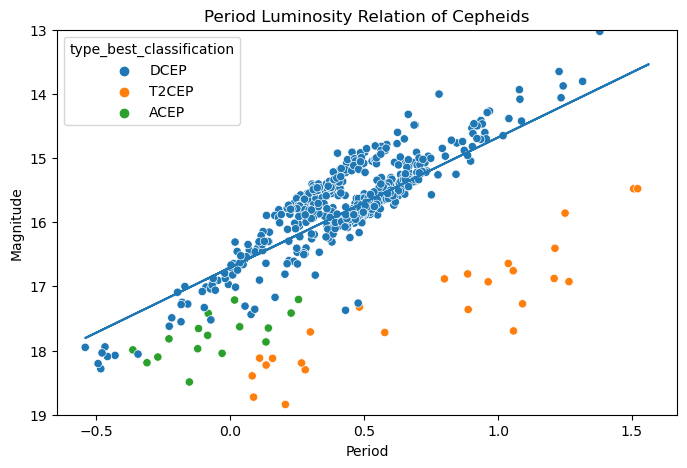

In [64]:
df['Period']= df['p1']
df['Magnitude'] = df['int_average_g']
fig,ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=np.log10(df['Period']),y=df['Magnitude'],data = df,hue = df['type_best_classification'])
ax.set_ylim(19,13)
ax.set_title('Period Luminosity Relation of Cepheids')
a, b = np.polyfit(np.log10(df['Period']),df['Magnitude'], 1)
plt.plot(np.log10(df['Period']),a*np.log10(df['Period'])+b)

print(a,b)

In [60]:
df2 = df.loc[df['type_best_classification']=='DCEP']
df2

,p1,int_average_g,type_best_classification,type2_best_sub_classification,mode_best_classification,Period,Magnitude
0,0.811043,17.009720,DCEP,NaN,UNDEFINED,0.811043,17.009720
1,3.384487,15.047713,DCEP,NaN,FIRST_OVERTONE,3.384487,15.047713
2,2.693312,17.372186,DCEP,NaN,UNDEFINED,2.693312,17.372186
3,3.562781,15.650187,DCEP,NaN,FUNDAMENTAL,3.562781,15.650187
4,2.795692,15.150801,DCEP,NaN,FIRST_OVERTONE,2.795692,15.150801
...,...,...,...,...,...,...,...
591,0.654386,17.551555,DCEP,NaN,UNDEFINED,0.654386,17.551555
592,6.966171,15.253028,DCEP,NaN,FUNDAMENTAL,6.966171,15.253028
593,0.799345,17.330161,DCEP,NaN,FIRST_OVERTONE,0.799345,17.330161
594,2.514530,14.924123,DCEP,NaN,FUNDAMENTAL,2.514530,14.924123


-2.287830840523021 16.697746261823692


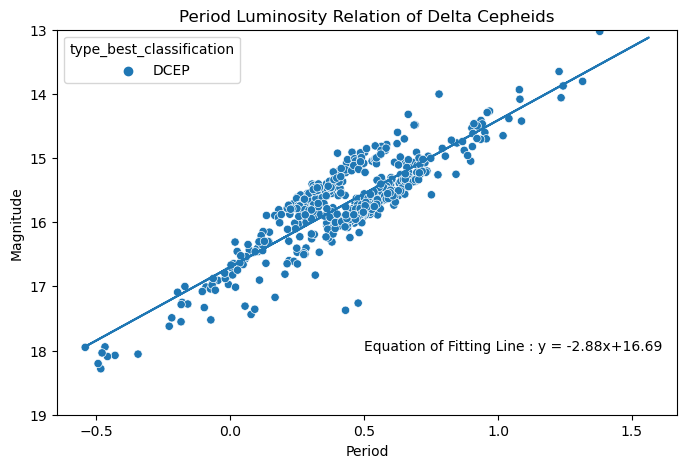

In [68]:
fig,ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=np.log10(df2['Period']),y=df2['Magnitude'],data = df2,hue = df2['type_best_classification'])
ax.set_ylim(19,13)
ax.set_title('Period Luminosity Relation of Delta Cepheids')
a, b = np.polyfit(np.log10(df2['Period']),df2['Magnitude'], 1)
plt.plot(np.log10(df2['Period']),a*np.log10(df2['Period'])+b)
plt.text(0.5,18,"Equation of Fitting Line : y = -2.88x+16.69")

print(a,b)

Text(0.5, 1.0, 'Period Count of Cepheid Data')

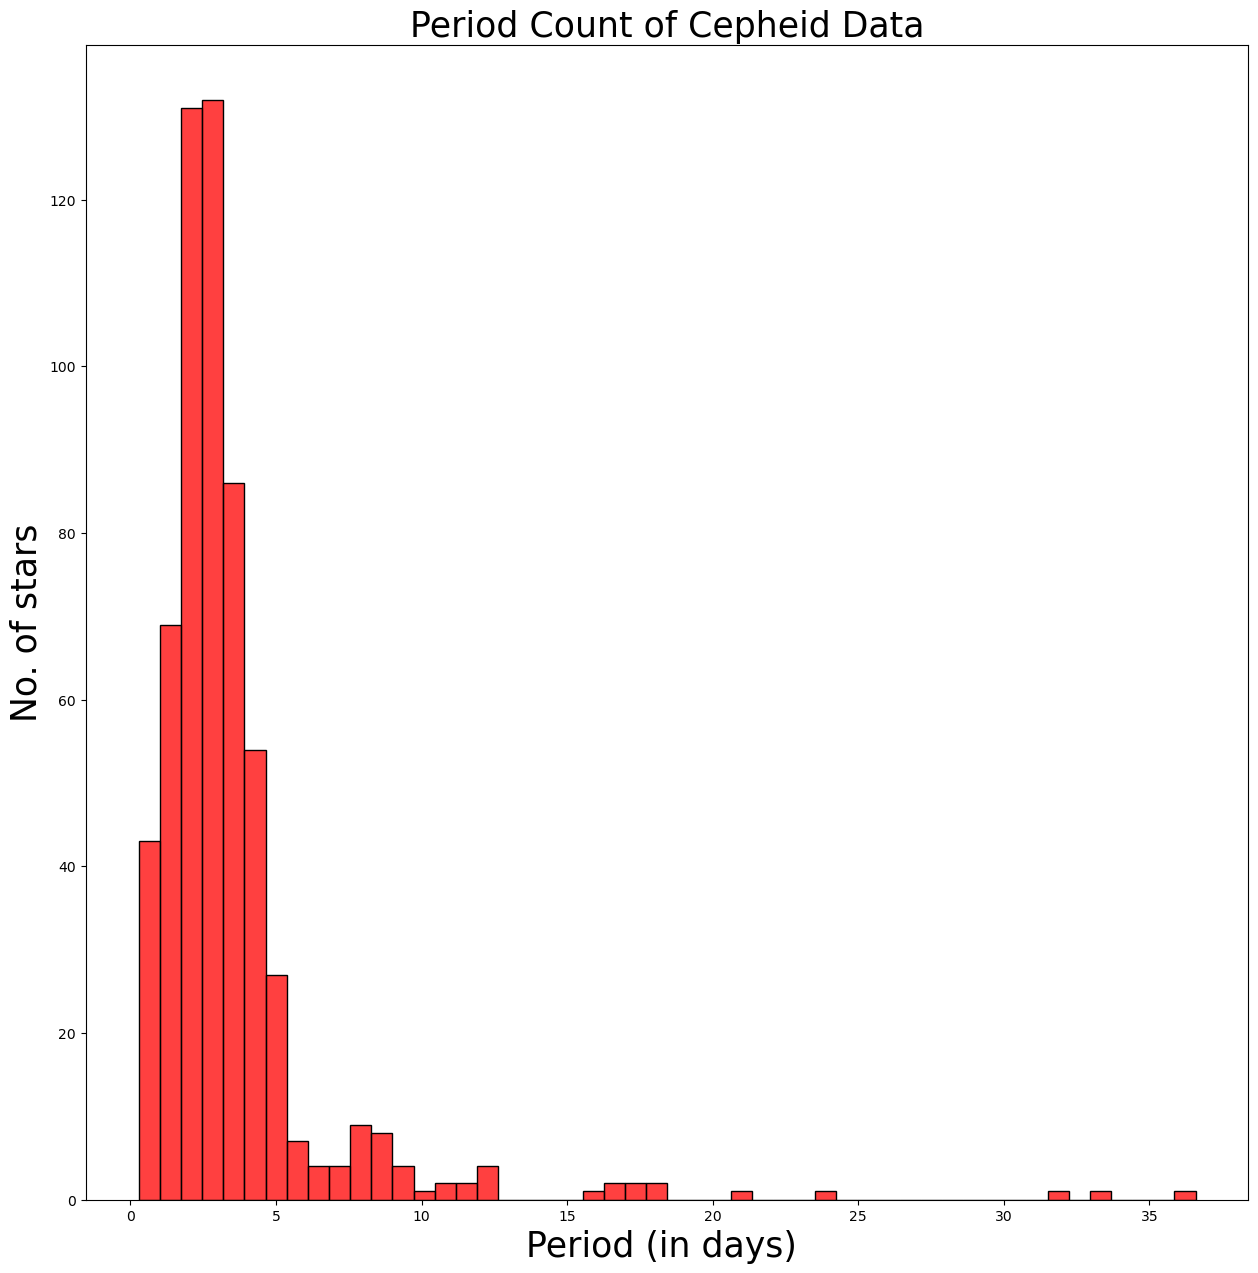

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
sns.histplot(data = df , x=df['p1'],bins=50,color ='red')
ax.set_xlabel('Period (in days) ',fontdict={'fontsize':25})
ax.set_ylabel('No. of stars',fontdict={'fontsize':25})
ax.set_title('Period Count of Cepheid Data',fontdict={'fontsize':25})

# <B>Results and Conclusion </B> 

I have reproduced the results of previous research with this data analysis task.
The result I obtained are following :

1. The variable stars lie in HR-Diagram in a narrow strip of region known as Instability Strip.

2. The temperature in instability strip is fairly constant between 5000-8000 K with some stars reaching to 10,000 K

3. The Period Luminosity Relation obtained by this data is <B>Magnitude = -2.02*log(Period)+16.706 </B>, when the whole dataset is considered 

4. When only taking Delta Cepheids The Period Luminosity Relation obtained is <B> Magnitude = -2.28*log(Period)+16.697 </B>


Some variations from accepted value is there in the obtained value and further analysis is required for the following and there is scope of further work in this.

# <B> Ethics</B>

All the data is obtained from the publicly released data of the GAIA sky survey through direct query to the databse when possible or through downloaded CSV Tables 

# <B>Acknowledgement</B>

I am thankful to Parthi Sir for this amazing course of DSP 315 that offered me knowledge to carry out the analysis and the TAs for the course who are there to resolve the doubts.
I am also thankful to European Space Agency , for their effort to make the GAIA data publicaly and freely available , such analysis are possible due to them.
